In [87]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train_data = pd.read_csv(r"Data\train.csv")
add_data = pd.read_csv(r"Data\additional_data.csv")

In [89]:
add_data[add_data['Feature 22'].isnull()]

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
26,26,27,0.34,0,0,1,0,0,1,0,...,0,0,0,0,NaN,57.0,4.50,4.44,2.74,803
86,86,87,0.74,0,0,1,0,0,0,1,...,0,0,0,0,NaN,59.0,5.92,5.97,3.52,2501
117,117,118,1.00,0,0,0,1,0,0,0,...,0,0,0,0,NaN,59.0,6.40,6.36,4.00,5292
148,148,149,1.11,0,0,0,1,0,0,1,...,0,0,0,0,NaN,61.0,6.66,6.61,4.09,4177
163,163,164,1.00,0,0,0,0,1,0,0,...,0,1,0,0,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26848,26848,26849,1.22,0,0,0,0,1,0,0,...,1,0,0,0,NaN,59.0,6.91,6.85,4.29,7673
26854,26854,26855,1.29,0,0,0,1,0,0,0,...,0,1,0,0,NaN,58.0,7.12,7.03,4.27,6321
26879,26879,26880,0.51,0,0,0,0,1,0,1,...,0,0,0,0,NaN,58.0,5.10,5.13,3.12,1343
26923,26923,26924,0.51,0,0,1,0,0,1,0,...,0,1,0,0,NaN,57.0,5.12,5.09,3.18,1882


In [90]:
master = pd.concat([train_data,add_data])

In [91]:
master = master[~master['Feature 22'].isnull()]

In [92]:
master['price2'] = master['price'] / master['Feature 1']
master['price3'] = master['price'] / master['Feature 1'].apply(lambda x : x*x)

In [93]:
master

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3
0,143728,143728,0.53,0,0,1,0,0,0,1,...,0,0,62.0,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,63.8,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000
2,124407,124407,2.03,0,0,1,0,0,0,0,...,0,0,59.2,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911
3,45535,45535,0.33,0,0,1,0,0,0,1,...,0,0,61.5,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457
4,178894,178894,0.90,0,1,0,0,0,0,0,...,0,0,63.6,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,26962,26963,1.11,0,0,0,1,0,0,0,...,0,0,62.3,58.0,6.61,6.52,4.09,5408,4872.072072,4389.254119
26963,26963,26964,0.33,0,0,1,0,0,0,0,...,0,0,61.9,55.0,4.44,4.42,2.74,1114,3375.757576,10229.568411
26964,26964,26965,0.51,0,0,0,1,0,0,1,...,0,0,61.7,58.0,5.12,5.15,3.17,1656,3247.058824,6366.782007
26965,26965,26966,0.27,0,0,0,0,1,0,0,...,0,1,61.8,56.0,4.19,4.20,2.60,682,2525.925926,9355.281207


In [94]:
master = master.drop('Unnamed: 0',axis=1)

<Axes: xlabel='price', ylabel='Count'>

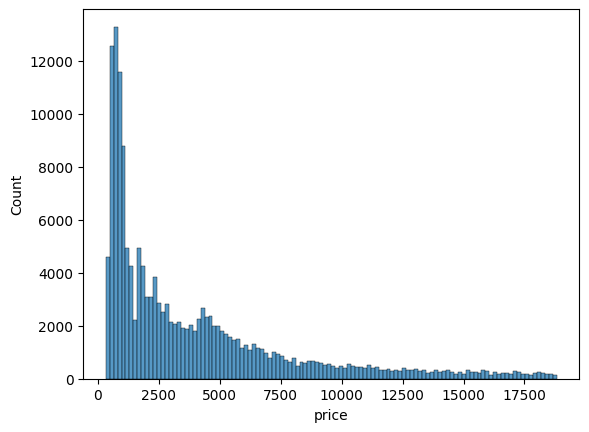

In [105]:
sns.histplot(x='price',data=master)

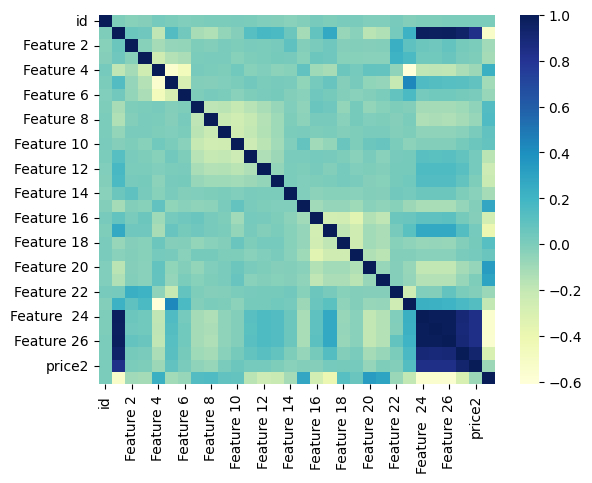

In [96]:
dataplot = sns.heatmap(master.corr(), cmap="YlGnBu")

In [109]:
master.loc[(master['price2'] > 11000)].shape


(239, 30)

In [110]:
master = master.loc[(master['price2'] < 11000)]

<Axes: xlabel='price2', ylabel='Count'>

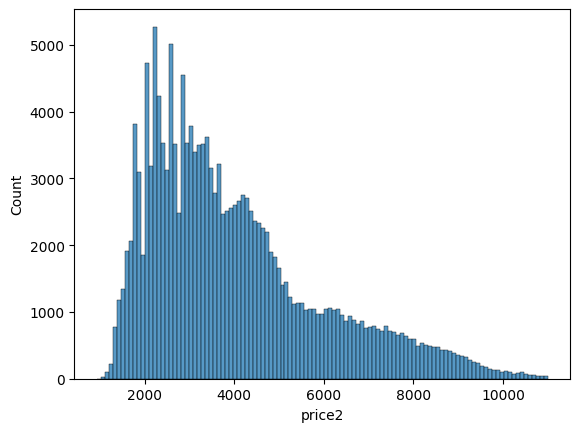

In [111]:
sns.histplot(x='price2',data=master)

<Axes: xlabel='price3', ylabel='Count'>

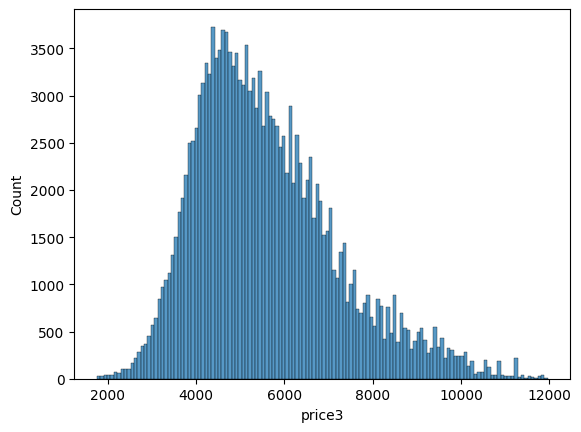

In [112]:
sns.histplot(x='price3',data=master)

In [99]:
master.loc[master['price3'] > 15000 ].count()

id             55
Feature 1      55
Feature 2      55
Feature 3      55
Feature 4      55
Feature 5      55
Feature 6      55
Feature 7      55
Feature 8      55
Feature 9      55
Feature 10     55
Feature 11     55
Feature 12     55
Feature 13     55
Feature 14     55
Feature 15     55
Feature 16     55
Feature 17     55
Feature 18     55
Feature 19     55
Feature 20     55
Feature 21     55
Feature 22     55
Feature 23     55
Feature  24    55
Feature 25     55
Feature 26     55
price          55
price2         55
price3         55
dtype: int64

In [100]:
master.loc[(master['price3'] > 12000) | (master['price3'] < 1750) ].shape

(331, 30)

In [101]:
master = master.loc[(master['price3'] < 12000) & (master['price3'] > 1750)]

<Axes: xlabel='price3', ylabel='Count'>

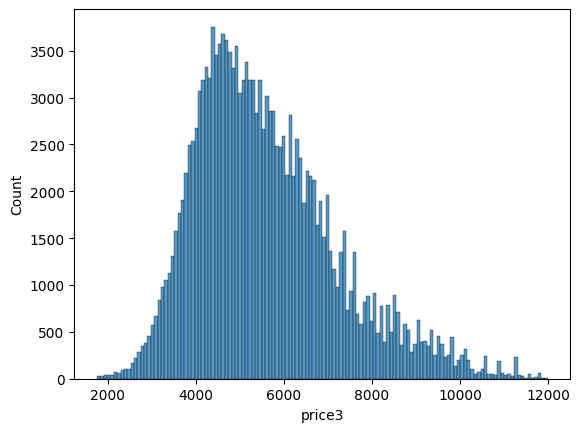

In [102]:
sns.histplot(x='price3',data=master)

In [85]:
master.to_csv('./Data/master2.csv',index=False)